In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lesson 17: Comparing Distributions

## Mendel and Pea Flowers ##

In [2]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [3]:
predicted_proportions = make_array(.75, .25)

In [9]:
sample_proportions(929, predicted_proportions)

array([ 0.74058127,  0.25941873])

In [10]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [11]:
purple_flowers()

74.91926803013995

In [12]:
purples = make_array()
trials = 10000

for i in np.arange(trials):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

In [13]:
purples

array([ 73.30462863,  75.78040904,  73.62755651, ...,  73.73519914,
        73.62755651,  75.45748116])

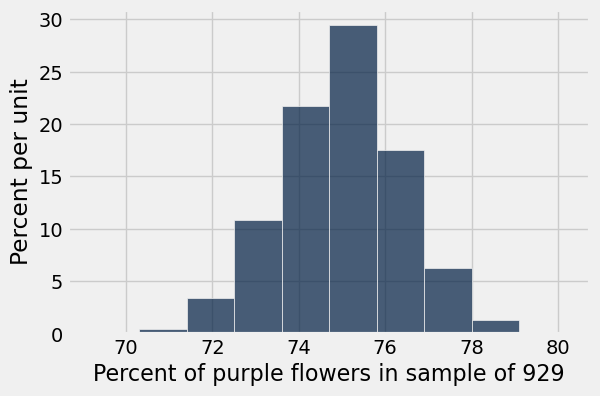

In [14]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [15]:
statistics = abs( purples - 75 )

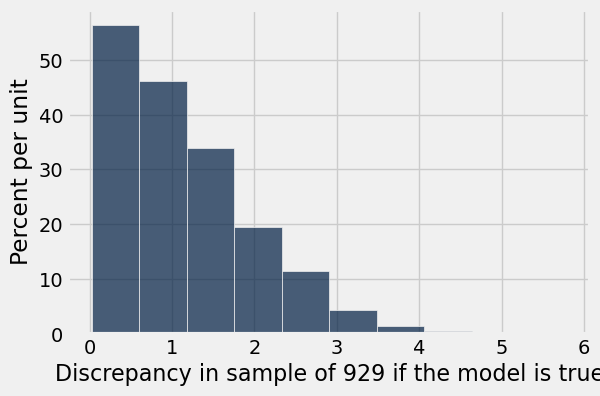

In [16]:
Table().with_column('Discrepancy in sample of 929 if the model is true', statistics).hist()

In [17]:
abs(observed_purples * 100 - 75)

1.318622174381062

## Alameda County Jury Panels ##

In [ ]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

In [ ]:
jury.barh('Ethnicity')

In [ ]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [ ]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

In [ ]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

In [ ]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [ ]:
# In the last lecture, the difference between observed black/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

## Total Variation Distance

In [ ]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [ ]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

In [ ]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

In [ ]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

In [ ]:
len(tvds)

In [ ]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))

In [ ]:
model = make_array(0.13, 0.14, 0.20, 0.16, 0.24, 0.13)

In [ ]:
MM = Table().with_columns(
    'Color', make_array('Brown', 'Yellow', 'Orange', 'Green', 'Blue', 'Red'),
    'Claim', make_array(0.13, 0.14, 0.20, 0.16, 0.24, 0.13),
    'Observed', make_array(0.096, 0.107, 0.276, 0.103, 0.304,0.114)
)

MM

In [ ]:
simulated = sample_proportions(910, model)
simulated

In [ ]:
MM_with_simulated = MM.with_column('Simulated', simulated)
MM_with_simulated

In [ ]:
diffs = MM.column('Observed') - MM.column('Claim')
MM_with_difference = MM.with_column('Difference', diffs)
MM_with_difference

In [ ]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [ ]:
obsvd_tvd = tvd(MM.column('Observed'), MM.column('Claim'))
obsvd_tvd

In [ ]:
tvd(sample_proportions(981, model), MM.column('Claim'))

In [ ]:
def simulated_tvd():
    return tvd(sample_proportions(981, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

In [ ]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))